# 1. Import Libraries

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from jcopml.plot import plot_missing_value

# 2. Import Dataset

In [67]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# 3. Exploratory Data Analysis

### Data information

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


### Data Description 

In [69]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [70]:
df.describe(include='O')

,Genre
count,200
unique,2
top,Female
freq,112


### Check missing value

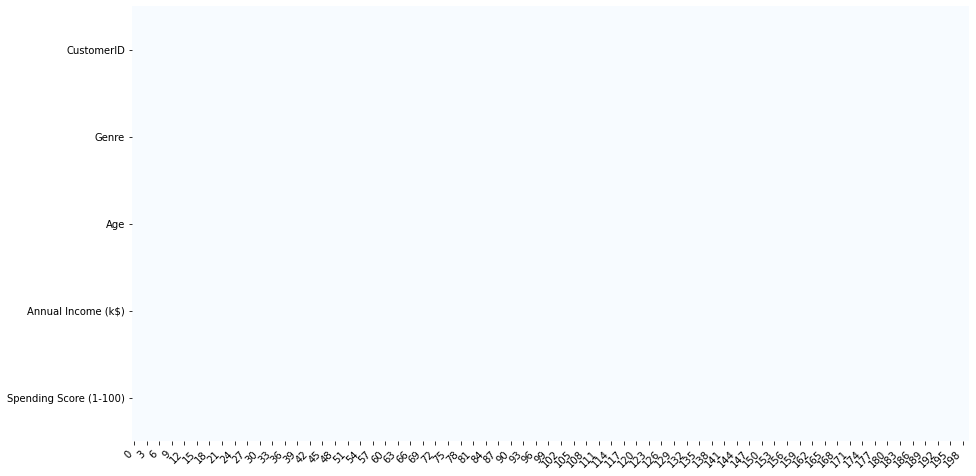

In [71]:
plot_missing_value(df)

### Average of Annual Income and Spending Score based on Genre

In [109]:
df.groupby('Genre')['Annual Income (k$)','Spending Score (1-100)'].mean()

C:\Users\MALIKA~1\AppData\Local\Temp/ipykernel_67164/2520464794.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('Genre')['Annual Income (k$)','Spending Score (1-100)'].mean()


,Annual Income (k$),Spending Score (1-100)
Genre,,
Female,59.250000,51.526786
Male,62.227273,48.511364


### Genre Distribution

In [119]:
df.Genre.value_counts()

Female    112
Male       88
Name: Genre, dtype: int64

C:\Users\Malik Afu Hamid\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Genre', ylabel='count'>

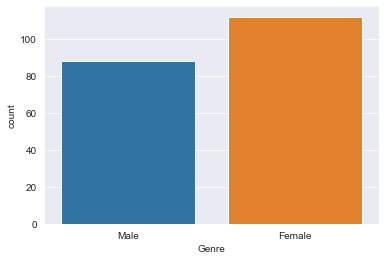

In [121]:
sns.countplot(df.Genre)

### Create a Stacked Histogram for Annual Income based on Genre Column

C:\Users\Malik Afu Hamid\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


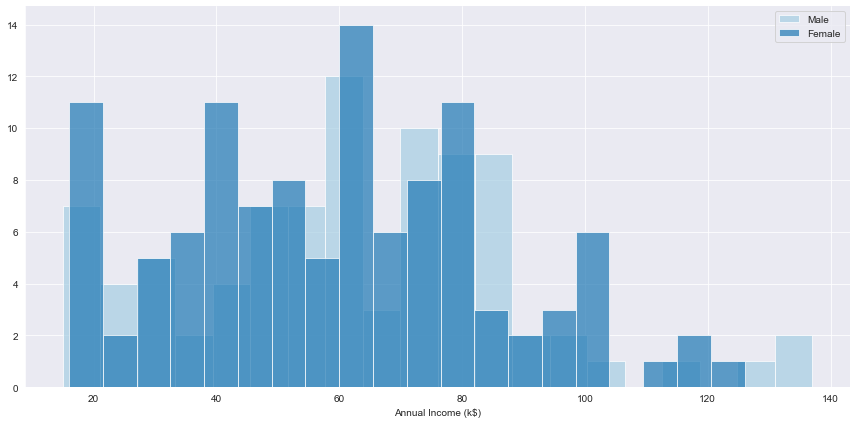

In [117]:
sns.set_style('darkgrid')
hist_plot = sns.FacetGrid(df,hue="Genre",palette='Paired',size=6,aspect=2)
hist_plot = hist_plot.map(plt.hist,'Annual Income (k$)',bins=20,alpha=0.7)
plt.legend()

### Create a Stacked Histogram for Spending Score (1-100) based on Genre Column

C:\Users\Malik Afu Hamid\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


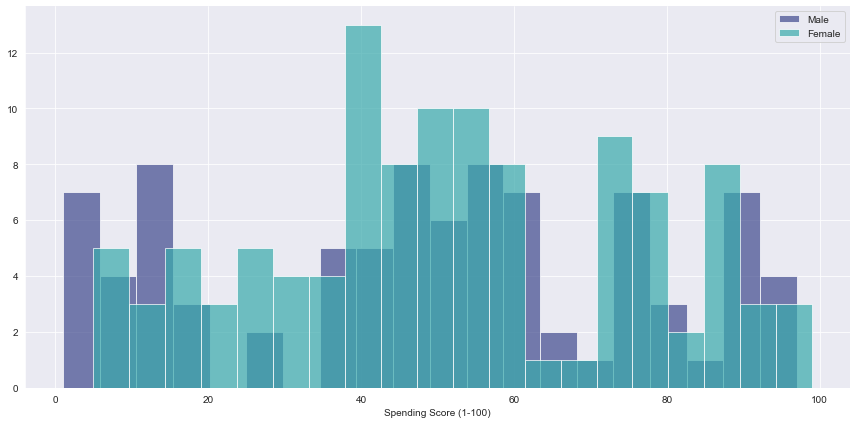

In [118]:
sns.set_style('darkgrid')
hist_plot = sns.FacetGrid(df,hue="Genre",palette='mako',size=6,aspect=2)
hist_plot = hist_plot.map(plt.hist,'Spending Score (1-100)',bins=20,alpha=0.7)
plt.legend()

### Scatter plot of Annual Income vs Spending Score based on Genre

C:\Users\Malik Afu Hamid\anaconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


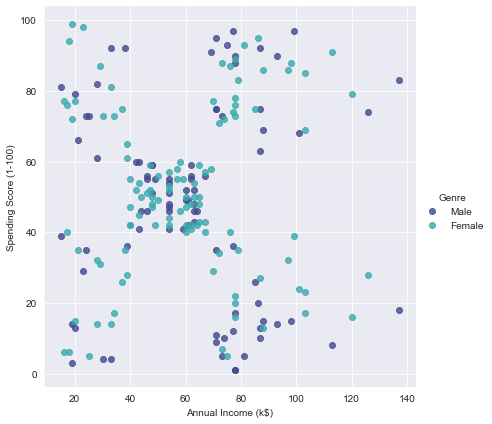

In [124]:
sns.set_style('darkgrid')
sns.lmplot(x = 'Annual Income (k$)', y= 'Spending Score (1-100)', data=df, hue='Genre', palette='mako',size=6,aspect=1,fit_reg=False)

# 4. Determine the number of cluster

In [72]:
import scipy.cluster.hierarchy as sch

In [73]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [74]:
X = df.iloc[:, [3,4]].values

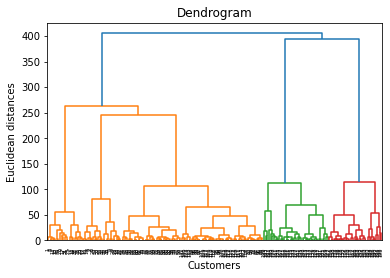

In [75]:
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers') 
plt.ylabel('Euclidean distances')
plt.show()

# 5. Modeling

In [76]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import NearestCentroid

In [77]:
model = AgglomerativeClustering(n_clusters= 5, affinity = 'euclidean', linkage = 'ward')
cluster = model.fit_predict(X)

In [79]:
centroids = NearestCentroid()
centroids.fit(X, cluster)
print(centroids.centroids_)

[[89.40625    15.59375   ]
 [55.81176471 49.12941176]
 [86.53846154 82.12820513]
 [25.0952381  80.04761905]
 [26.30434783 20.91304348]]


In [80]:
df_pred = df.copy()
df_pred['Cluster'] = cluster
df_pred

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,0
197,198,Male,32,126,74,2
198,199,Male,32,137,18,0


# 6. Analyze the cluster

In [81]:
num = centroids.centroids_

In [91]:
df_cluster = pd.DataFrame(num)
df_cluster.rename(columns={0:'Annual Income', 1:'Spending Score'})

,Annual Income,Spending Score
0,89.406250,15.593750
1,55.811765,49.129412
2,86.538462,82.128205
3,25.095238,80.047619
4,26.304348,20.913043


In [92]:
df.iloc[:, [3,4]].mean()

Annual Income (k$)        60.56
Spending Score (1-100)    50.20
dtype: float64

### Cluster 1

In [94]:
df_pred[df_pred['Cluster'] == 0].head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
128,129,Male,59,71,11,0
130,131,Male,47,71,9,0
134,135,Male,20,73,5,0
136,137,Female,44,73,7,0
138,139,Male,19,74,10,0


### Cluster 2

In [95]:
df_pred[df_pred['Cluster'] == 1].head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
43,44,Female,31,39,61,1
45,46,Female,24,39,65,1
46,47,Female,50,40,55,1
47,48,Female,27,40,47,1
48,49,Female,29,40,42,1


### Cluster 3

In [96]:
df_pred[df_pred['Cluster'] == 2].head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
123,124,Male,39,69,91,2
125,126,Female,31,70,77,2
127,128,Male,40,71,95,2
129,130,Male,38,71,75,2
131,132,Male,39,71,75,2


### Cluster 4

In [125]:
df_pred[df_pred['Cluster'] == 3].head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
1,2,Male,21,15,81,3
3,4,Female,23,16,77,3
5,6,Female,22,17,76,3
7,8,Female,23,18,94,3
9,10,Female,30,19,72,3


### Cluster 5

In [126]:
df_pred[df_pred['Cluster'] == 4].head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
2,3,Female,20,16,6,4
4,5,Female,31,17,40,4
6,7,Female,35,18,6,4
8,9,Male,64,19,3,4


## 6.1 Visualize the clusters

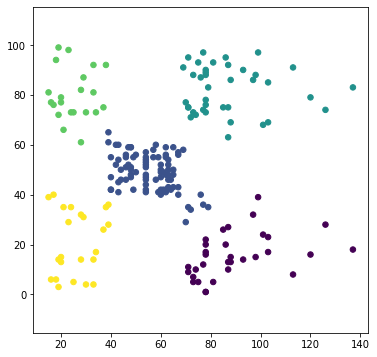

In [97]:
plt.figure(figsize=(6,6))
plt.scatter(X[:, 0], X[:, 1], c=cluster, s=30)
plt.axis('equal');